# Training Notebook

### Description
This notebook is used for loading and cleaning the data, exploratory data analysis, and training and evaluating the models.

In [1]:
# Importing the libraries
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import json
import math
from sklearn.model_selection import train_test_split

### 1.  Read Dataset and remove NAN values

In [11]:
diamonds = pd.read_csv('diamonds.csv')

diamonds.dropna(inplace=True)
diamonds.describe()

carat         depth         table         price             x  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean       0.797940     61.749405     57.457184   3932.799722      5.731157   
std        0.474011      1.432621      2.234491   3989.439738      1.121761   
min        0.200000     43.000000     43.000000    326.000000      0.000000   
25%        0.400000     61.000000     56.000000    950.000000      4.710000   
50%        0.700000     61.800000     57.000000   2401.000000      5.700000   
75%        1.040000     62.500000     59.000000   5324.250000      6.540000   
max        5.010000     79.000000     95.000000  18823.000000     10.740000   

                  y             z  
count  53940.000000  53940.000000  
mean       5.734526      3.538734  
std        1.142135      0.705699  
min        0.000000      0.000000  
25%        4.720000      2.910000  
50%        5.710000      3.530000  
75%        6.540000      4.040000  
max       58.900000     31.800000

### 2.  Mapping non-numerical values to numerical ones

Here we map the non-numerical values to numerical ones. This is done to make the data more readable for the models.

**Cut Quality**
| Cut       | Ideal | Premium | Good | Very Good | Fair |
|-----------|-------|---------|------|-----------|------|
| Mapping   | 0     | 1       | 2    | 3         | 4    |

**Color Grade**
| Color     | E | I | J | H | F | G | D |
|-----------|---|---|---|---|---|---|---|
| Mapping   | 0 | 1 | 2 | 3 | 4 | 5 | 6 |

**Clarity Grade**
| Clarity   | SI2 | SI1 | VS1 | VS2 | VVS2 | VVS1 | I1 | IF |
|-----------|-----|-----|-----|-----|------|------|----|----|
| Mapping   | 0   | 1   | 2   | 3   | 4    | 5    | 6  | 7  |


In [7]:
cut_mapping = {cut: i for i, cut in enumerate(diamonds['cut'].unique())}
color_mapping = {color: i for i, color in enumerate(diamonds['color'].unique())}
clarity_mapping = {clarity: i for i, clarity in enumerate(diamonds['clarity'].unique())}

### 3.  Replace the non-numerical columns with their numerical mappings

In [8]:
diamonds_numerical = diamonds.copy()
diamonds_numerical['cut'] = diamonds['cut'].map(cut_mapping)
diamonds_numerical['color'] = diamonds['color'].map(color_mapping)
diamonds_numerical['clarity'] = diamonds['clarity'].map(clarity_mapping)

### 4. Remove rows with x, y, or z values of 0

In [12]:
# store rows where x or y or z is 0
zero_rows = diamonds[(diamonds['x'] == 0) | (diamonds['y'] == 0) | (diamonds['z'] == 0)]
zero_rows.describe()

carat    depth      table         price         x          y     z
count  20.000000  20.0000  20.000000     20.000000  20.00000  20.000000  20.0
mean    1.449000  61.4550  58.400000   8803.100000   4.46500   4.761000   0.0
std     0.609105   2.1045   3.118704   6376.126236   3.80866   3.658691   0.0
min     0.710000  57.5000  53.000000   2130.000000   0.00000   0.000000   0.0
25%     1.010000  59.3500  57.500000   3563.750000   0.00000   0.000000   0.0
50%     1.145000  61.8500  59.000000   5351.500000   6.52500   6.540000   0.0
75%     2.060000  63.0750  59.250000  15469.250000   7.36750   7.267500   0.0
max     2.800000  64.1000  67.000000  18788.000000   8.90000   8.850000   0.0

In [13]:
# drop rows with outliers (x = 0, y = 0 or z = 0)
mask = (diamonds_numerical['x'] == 0) | (diamonds_numerical['y'] == 0) | (diamonds_numerical['z'] == 0)
diamonds_numerical = diamonds_numerical.drop(diamonds_numerical[mask].index)
# write diamonds_numerical to csv
diamonds_numerical.to_csv('diamonds_numerical.csv', index=True)

### 5. Plot the data

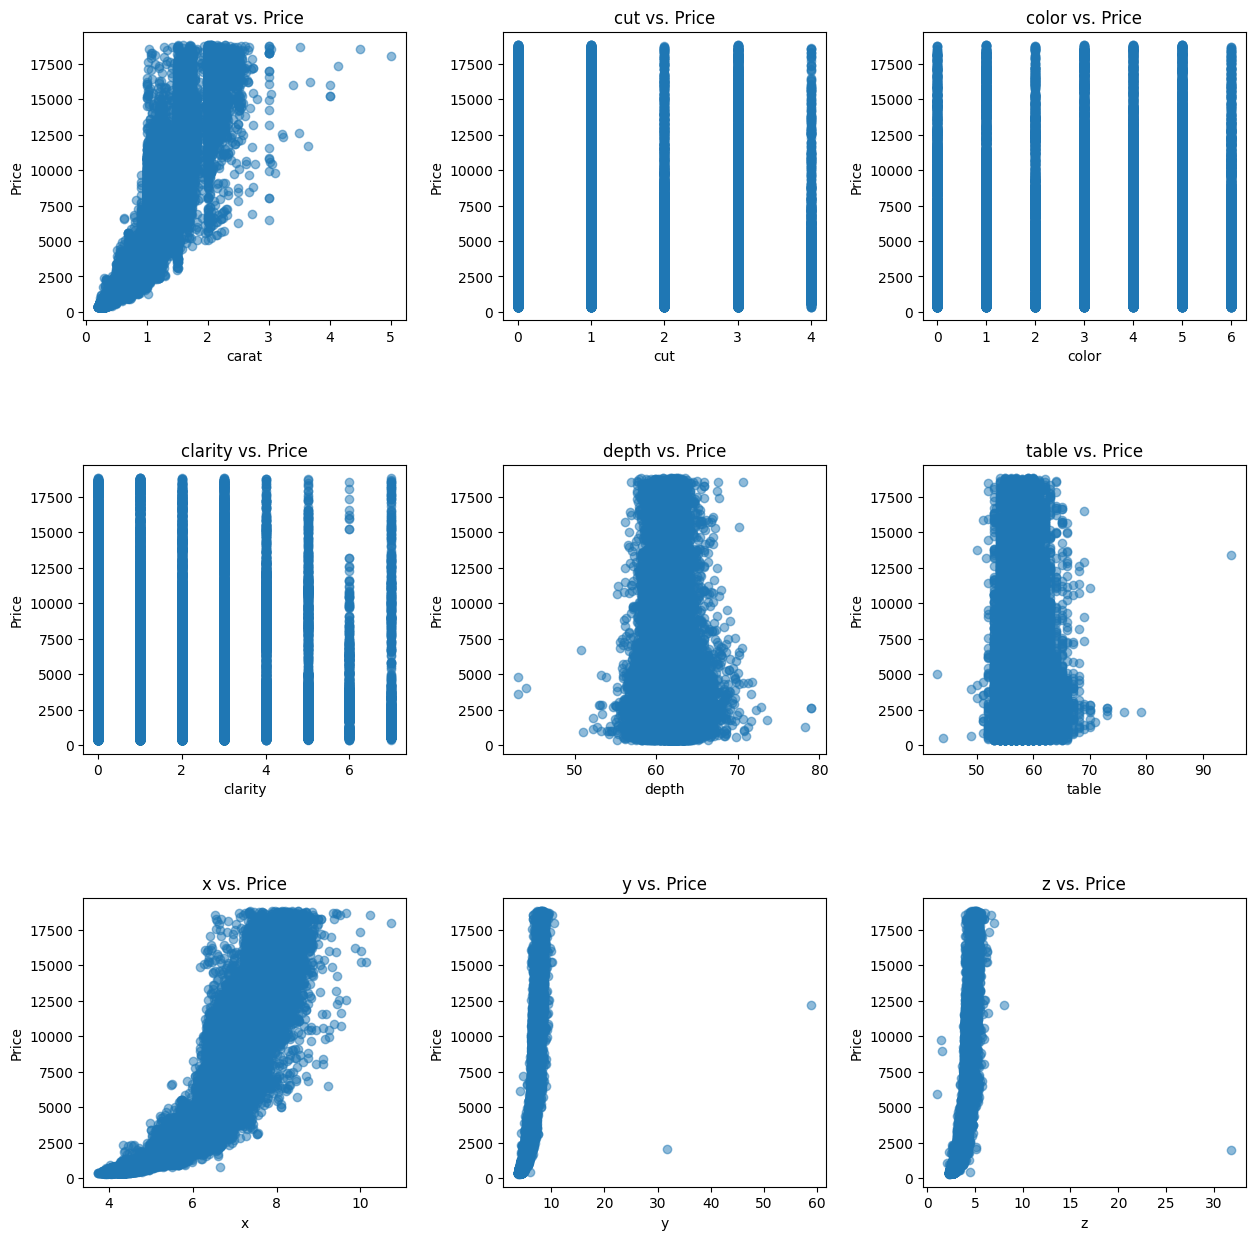

In [14]:
# Creating separate plots for each feature against price
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
fig.subplots_adjust(hspace=0.5, wspace=0.3)

# List of all the features except price
features = diamonds_numerical.columns.drop('price')

# Plot each feature against price
for ax, feature in zip(axes.flatten(), features):
    ax.scatter(diamonds_numerical[feature], diamonds_numerical['price'], alpha=0.5)
    ax.set_title(f'{feature} vs. Price')
    ax.set_xlabel(feature)
    ax.set_ylabel('Price')

plt.show()


### 5. Split the data into training and testing sets

In [16]:
X = diamonds_numerical.drop('price', axis = 1)
X = X.drop('cut', axis = 1)
y = diamonds_numerical['price']
X.head()

carat  color  clarity  depth  table     x     y     z
0   0.23      0        0   61.5   55.0  3.95  3.98  2.43
1   0.21      0        1   59.8   61.0  3.89  3.84  2.31
2   0.23      0        2   56.9   65.0  4.05  4.07  2.31
3   0.29      1        3   62.4   58.0  4.20  4.23  2.63
4   0.31      2        0   63.3   58.0  4.34  4.35  2.75

In [17]:
y.head()

0    326
1    326
2    327
3    334
4    335
Name: price, dtype: int64

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 6. Training and evaluating the models

####    Linear Regression

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
# Train the models
model.fit(X_train, y_train)
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

Mean Squared Error: 1920307.5427267884
R^2 Score: 0.8802199708126777


####   XGB Regression

In [21]:
from xgboost import XGBRegressor

model2 = XGBRegressor(n_estimators=100,random_state=42)
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)
mse2 = mean_squared_error(y_test, y_pred2)
r22 = r2_score(y_test, y_pred2)

Mean Squared Error: 307360.2125136214
R^2 Score: 0.9808282713019885


#### Random Forest Regression

In [23]:
from sklearn.ensemble import RandomForestRegressor

model3 = RandomForestRegressor(n_estimators=100, random_state=42)
model3.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error, r2_score
y_pred3 = model3.predict(X_test)
mse3 = mean_squared_error(y_test, y_pred3)
r23 = r2_score(y_test, y_pred3)

Mean Squared Error: 292726.7655844448
R^2 Score: 0.9817410390026241


#### Multi-layer Perceptron Regression

In [25]:
from sklearn.neural_network import MLPRegressor

model4 = MLPRegressor(random_state=42, max_iter=500)
model4.fit(X_train, y_train)
y_pred4 = model4.predict(X_test)
mse4 = mean_squared_error(y_test, y_pred4)
r24 = r2_score(y_test, y_pred4)

/home/fadi/Desktop/dev/sas2/clone2/ws-23-sas-02/sas2/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


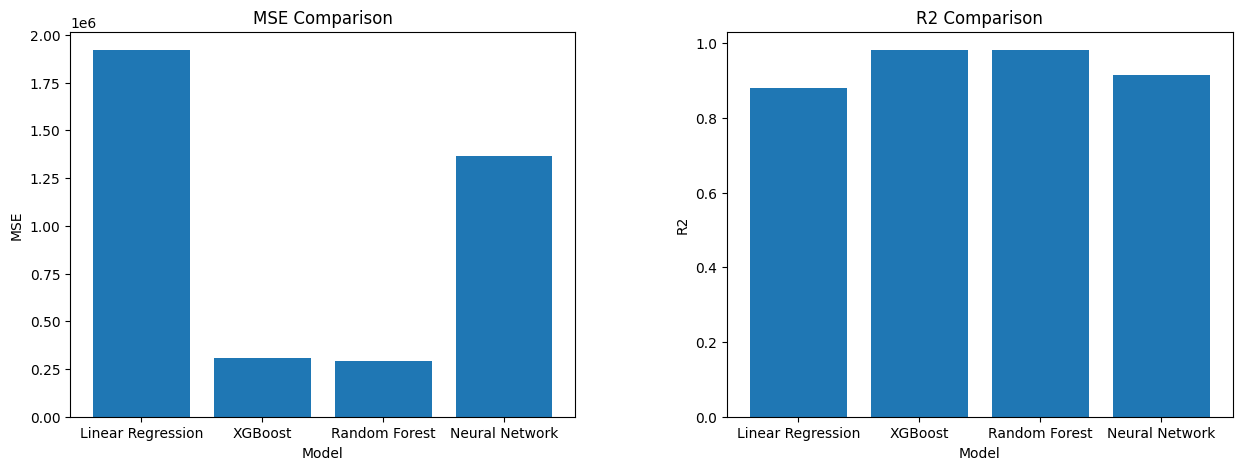

In [27]:
#### compare mse and r2

mse_list = [mse, mse2, mse3, mse4]
r2_list = [r2, r22, r23, r24]
model_list = ['Linear Regression', 'XGBoost', 'Random Forest', 'Neural Network']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
fig.subplots_adjust(hspace=0.5, wspace=0.3)
for ax, metric, metric_name in zip(axes.flatten(), [mse_list, r2_list], ['MSE', 'R2']):
    ax.bar(model_list, metric)
    ax.set_title(f'{metric_name} Comparison')
    ax.set_xlabel('Model')
    ax.set_ylabel(metric_name)

### Conclusion

## Conclusion

In this notebook, we performed various data preprocessing steps and trained multiple regression models to predict the price of diamonds. Here are the key findings:

1. Data Preprocessing:
   - We loaded the dataset and removed rows with missing values.
   - We mapped non-numerical values to numerical ones for better model interpretability.
   - We removed rows with zero values for the dimensions of the diamonds.

2. Exploratory Data Analysis:
   - We plotted the relationships between different features and the price of diamonds.
   - The scatter plots showed some correlation between certain features and the price.

3. Model Training and Evaluation:
   - We trained four regression models: Linear Regression, XGBoost Regression, Random Forest Regression, and Multi-layer Perceptron Regression.
   - We evaluated the models using mean squared error (MSE) and R-squared (R2) metrics.
   - The XGBoost Regression model achieved the lowest MSE and highest R2 score, indicating better performance compared to other models.

Based on our analysis, the XGBoost Regression model is recommended for predicting the price of diamonds. However, further optimization and fine-tuning of the models can be explored to improve their performance.

This notebook serves as a comprehensive guide for data preprocessing, exploratory data analysis, and regression modeling in the context of diamond price prediction.
